# ANN with Keras

## Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

In [4]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [6]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

## TensorFlow

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
# For simplicity purposes, we’ll scale the pixel intensities down to the 0–1 range by dividing them by 255.0
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Coat'

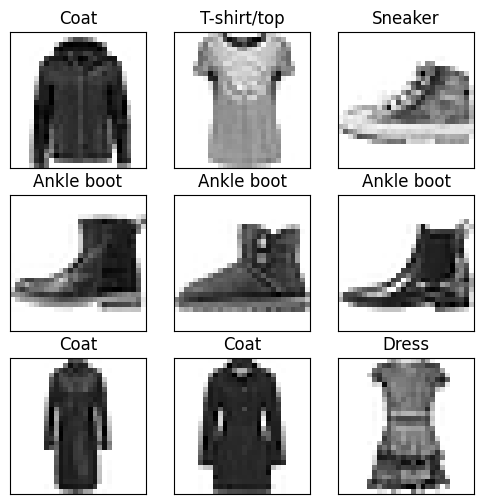

In [7]:
# Display first 9 images
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks
    plt.grid(False) # Remove grid
    plt.imshow(X_train[i], cmap=plt.cm.binary)  # Show image in grayscale
    plt.title(class_names[y_train[i]])
plt.show()

In [ ]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu")) #keras.activations.relu
# model.add(keras.layers.Dense(100, activation="relu")) #keras.activations.relu
# model.add(keras.layers.Dense(10, activation="softmax")) #keras.activations.softmax

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

2025-04-14 22:31:25.833734: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-04-14 22:31:25.833762: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-04-14 22:31:25.833773: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-04-14 22:31:25.833962: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-14 22:31:25.833986: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [12]:
weights, bias = hidden1.get_weights()
weights

array([[-0.00680172, -0.03894021, -0.03294423, ...,  0.04045657,
         0.00712753,  0.07310653],
       [-0.00953032,  0.05647108,  0.06830829, ..., -0.01412744,
        -0.01184883, -0.07325113],
       [-0.00156756,  0.01047658, -0.06777866, ...,  0.02228753,
        -0.05775522,  0.03713895],
       ...,
       [ 0.0281928 ,  0.04929028, -0.05894656, ...,  0.04449861,
        -0.00194233,  0.01082879],
       [-0.07114196,  0.05226229, -0.03733093, ...,  0.0578838 ,
        -0.05521645, -0.0249382 ],
       [ 0.06489958,  0.02478784, -0.05696137, ..., -0.0567129 ,
         0.04220756,  0.01115601]], dtype=float32)

In [13]:
weights.shape

(784, 300)

In [14]:
bias

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [15]:
bias.shape

(300,)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer= "sgd", metrics=["accuracy"])
# keras.losses.sparse_categorical_crossentropy.
# keras.optimizers.sgd
# keras.metrics.accuracy
# keras.metrics.sparse_categorical_accuracy

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/30
  14/1719 [..............................] - ETA: 7s - loss: 2.3859 - accuracy: 0.1562  

2025-04-14 22:32:00.649255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7225 - accuracy: 0.7536

2025-04-14 22:32:07.017966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 7s 4ms/step - loss: 0.7225 - accuracy: 0.7536 - val_loss: 0.5229 - val_accuracy: 0.8240
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5109 - accuracy: 0.8220 - val_loss: 0.4775 - val_accuracy: 0.8374
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4746 - accuracy: 0.8356 - val_loss: 0.4604 - val_accuracy: 0.8392
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4580 - accuracy: 0.8398 - val_loss: 0.4749 - val_accuracy: 0.8338
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4482 - accuracy: 0.8432 - val_loss: 0.4356 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4400 - accuracy: 0.8469 - val_loss: 0.4407 - val_accuracy: 0.8488
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4356 - accuracy: 0.8474 - val_loss: 0.4349 - val_accuracy: 0.8542
Epo

In [24]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

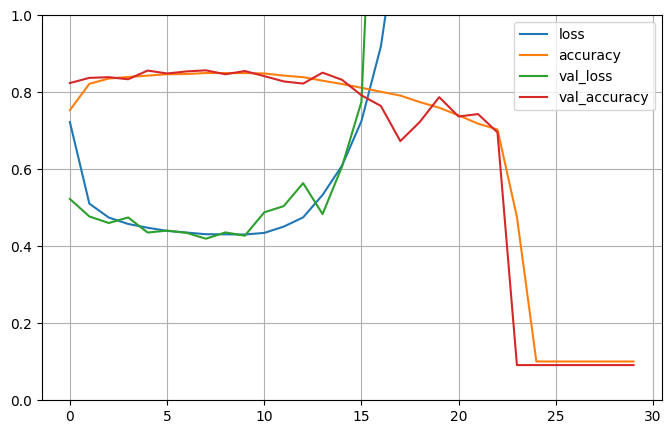

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()